Autor: Diego Peñaloza

In [11]:
import folium
import geopandas as gpd
import string
import random
from keplergl import KeplerGl

# Presentación Final - Area Conservación Ambiental

# Reto 1

## Eliminamos areas ya protegidas

In [244]:
# Cargamos la base Superficies CUT
cut_shape='data_concurso/Bases de datos_Categoría 2 DATEANDO POR LA CONSERVACION AMBIENTAL/Shapefile/CUT/v_ff010_cobertura_vegetal_2018_aPolygon.shp'
cut_gdf = gpd.read_file(cut_shape)

In [245]:
# Selecionamos solo los bosques nativos  del CUT
Bosque_Cut=cut_gdf[cut_gdf['cobertura0'].str.contains('BOSQUE NATIVO')]
Bosque_Cut

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9..."
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9..."
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9..."
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9..."
16,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((651053.410 9913156.350, 651053.410 9..."
...,...,...,...,...,...,...
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9..."
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410..."
152911,FF010,BOSQUE,BOSQUE NATIVO,2018.0,46.62,"POLYGON ((642023.410 9913546.350, 642023.410 9..."
152923,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((566423.410 9913186.350, 566363.410 9..."


In [277]:
# Generamos un Id para el numero de bosuqes nativos
# Bosque_Cut['id']=list(map(str, [str(i) for i in range(0,len(Bosque_Cut)) ]))

Bosque_Cut['id']= [''.join(random.choices(string.ascii_letters+string.digits,k=random.randint(7,8)))  for i in range(0,len(Bosque_Cut)) ]


C:\Users\Diego\anaconda3\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [278]:
Bosque_Cut

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",5L0NekS
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",N3nTBptn
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",K8OWKVf
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",qXKW4Jm
16,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((651053.410 9913156.350, 651053.410 9...",ORTYslUe
...,...,...,...,...,...,...,...
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",SJNPnxwK
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",gyDkpRC
152911,FF010,BOSQUE,BOSQUE NATIVO,2018.0,46.62,"POLYGON ((642023.410 9913546.350, 642023.410 9...",daOMSl6p
152923,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((566423.410 9913186.350, 566363.410 9...",TFL9LqC


In [279]:
# Verificamos que la colmna id no contenga valores repetidos para proceder con la limpieza, mas adelante se formara un id mas preciso.
# No enontrarse valores repetidos se repite el proceso de generación de Id
Bosque_Cut['id'].duplicated().sum()

0

In [249]:
# Cargamos la base de datos de bvp
bvp_shape='data_concurso/Bases de datos_Categoría 2 DATEANDO POR LA CONSERVACION AMBIENTAL/Shapefile/Superficie cubierta por Bosques y Vegetacion Protectores/v_hc000_bvp_aPolygon.shp'
bvp_gdf = gpd.read_file(bvp_shape)


In [280]:
# Combinamos los maspas para obtener los bosques en cada parroquia
boscut_bosq_rese=gpd.sjoin(Bosque_Cut,bvp_gdf,how='inner',op='within')

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [281]:
boscut_bosq_rese

,codigo_de__left,cobertura_,cobertura0,anio_de_re,area_super_left,geometry,id,index_right,codigo_de__right,codigo_dnf,nombre,registro_o,registro_0,tipo_de_bo,escala,area_super_right,validacion,perimetro,texto_asoc
16,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((651053.410 9913156.350, 651053.410 9...",ORTYslUe,1,HC000,BVP02,DAULE - PERIPA,REGISTRO OFICIAL NO. 684 DEL 13 MAYO DE 1987 C...,None,Estatal,50000.0,219574.099234,En verificaciÃ³n,349.715732,None
29,FF010,BOSQUE,BOSQUE NATIVO,2018.0,7.20,"POLYGON ((647003.410 9913486.350, 647003.410 9...",7eeRZjs,1,HC000,BVP02,DAULE - PERIPA,REGISTRO OFICIAL NO. 684 DEL 13 MAYO DE 1987 C...,None,Estatal,50000.0,219574.099234,En verificaciÃ³n,349.715732,None
43,FF010,BOSQUE,BOSQUE NATIVO,2018.0,5.76,"POLYGON ((641183.410 9913066.350, 641003.410 9...",BYW6XKt,1,HC000,BVP02,DAULE - PERIPA,REGISTRO OFICIAL NO. 684 DEL 13 MAYO DE 1987 C...,None,Estatal,50000.0,219574.099234,En verificaciÃ³n,349.715732,None
45,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((642473.410 9913096.350, 642473.410 9...",c5wNl5Q6,1,HC000,BVP02,DAULE - PERIPA,REGISTRO OFICIAL NO. 684 DEL 13 MAYO DE 1987 C...,None,Estatal,50000.0,219574.099234,En verificaciÃ³n,349.715732,None
46,FF010,BOSQUE,BOSQUE NATIVO,2018.0,5.22,"POLYGON ((648203.410 9913306.350, 648203.410 9...",tUe9ipB,1,HC000,BVP02,DAULE - PERIPA,REGISTRO OFICIAL NO. 684 DEL 13 MAYO DE 1987 C...,None,Estatal,50000.0,219574.099234,En verificaciÃ³n,349.715732,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141745,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((732413.410 9945796.350, 732353.410 9...",mfZhVjGc,24,HC000,BVP065,ZARAPULLO,REGISTRO OFICIAL NO. 489 DEL 30 DE JULIO DE 19...,None,Privado,50000.0,21328.833570,En verificaciÃ³n,93.195818,None
141918,FF010,BOSQUE,BOSQUE NATIVO,2018.0,3.15,"POLYGON ((734963.410 9945316.350, 734873.410 9...",w2tFuji,24,HC000,BVP065,ZARAPULLO,REGISTRO OFICIAL NO. 489 DEL 30 DE JULIO DE 19...,None,Privado,50000.0,21328.833570,En verificaciÃ³n,93.195818,None
138710,FF010,BOSQUE,BOSQUE NATIVO,2018.0,5.22,"POLYGON ((720083.410 9953836.350, 719993.410 9...",a4om1Cuy,16,HC000,BVP017,RIO LELIA,REGISTRO OFICIAL NO. 471 DEL 28 DE JUNIO DE 19...,None,Estatal,50000.0,3234.004645,En verificaciÃ³n,27.119929,None
138902,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.89,"POLYGON ((717803.410 9953236.350, 717743.410 9...",ILrUrZ4x,16,HC000,BVP017,RIO LELIA,REGISTRO OFICIAL NO. 471 DEL 28 DE JUNIO DE 19...,None,Estatal,50000.0,3234.004645,En verificaciÃ³n,27.119929,None


In [282]:
# Buscamos los bosques ya protegidos y los apartamos del dataframe principal de bosques
bos_prot=list(boscut_bosq_rese['id'])
len(bos_prot)

4059

In [283]:
39306-4059

35247

In [284]:
# Eliminamos aquellos bosuqes que ya se encunetrna en  bvp
contains_filter = '|'.join(bos_prot)
Bosque_Cut_v1=Bosque_Cut[~Bosque_Cut.id.str.match(contains_filter)]

In [285]:
Bosque_Cut_v1

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",5L0NekS
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",N3nTBptn
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",K8OWKVf
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",qXKW4Jm
23,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((858653.410 9913186.350, 858683.410 9...",iI5mFCyb
...,...,...,...,...,...,...,...
152891,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((561383.410 9913276.350, 561413.410 9...",AQN92ef
152904,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12.24,"POLYGON ((892313.410 9913246.350, 892253.410 9...",EQAJRImC
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",SJNPnxwK
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",gyDkpRC


In [286]:
# snap Protegidas
snap_shape='data_concurso/Bases de datos_Categoría 2 DATEANDO POR LA CONSERVACION AMBIENTAL/Shapefile/Superficie conservada a traves del Sistema Nacional de Areas Protegidas/v_fa210_snap_aPolygon.shp'
snap_gdf = gpd.read_file(snap_shape)

In [287]:
# Combinamos los maspas para obtener los bosques en cada parroquia
boscut_snap=gpd.sjoin(Bosque_Cut_v1,snap_gdf ,how='inner',op='within')

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [289]:
# Buscamos los bosques ya protegidos y los apartamos del dataframe principal de bosques
bos_snap=list(boscut_snap['id'])
len(bos_snap)

1721

In [290]:
35247 - 1721

33526

In [292]:
contains_filter_bos_snap = '|'.join(bos_snap)
Bosque_Cut_v2=Bosque_Cut_v1[~Bosque_Cut_v1.id.str.contains(contains_filter_bos_snap )]

In [293]:
Bosque_Cut_v2

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",5L0NekS
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",N3nTBptn
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",K8OWKVf
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",qXKW4Jm
23,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((858653.410 9913186.350, 858683.410 9...",iI5mFCyb
...,...,...,...,...,...,...,...
152891,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((561383.410 9913276.350, 561413.410 9...",AQN92ef
152904,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12.24,"POLYGON ((892313.410 9913246.350, 892253.410 9...",EQAJRImC
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",SJNPnxwK
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",gyDkpRC


In [294]:
# Superficies Proyecto Socio Bosque
psb_shape='data_concurso/Bases de datos_Categoría 2 DATEANDO POR LA CONSERVACION AMBIENTAL/Shapefile/Superficie de bosque nativo bajo conservacion mediante el Proyecto Socio Bosque/v_hc005_area_bajo_conservacion_aPolygon.shp'
psb_gdf = gpd.read_file(psb_shape)


In [295]:
# Combinamos los maspas para obtener los bosques que se encuentran en el PSB
boscut_psb=gpd.sjoin(Bosque_Cut_v2,psb_gdf ,how='inner',op='within')

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [296]:
boscut_psb

,codigo_de__left,cobertura_,cobertura0,anio_de_re,area_super_left,geometry,id,index_right,codigo_de__right,tipo_de_co,codigo_con,area_abc,fecha,estado_del,area_super_right,texto_asoc,PSB
2894,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((895403.410 9906196.350, 895403.410 9...",DvqEJQKf,1739,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-127,74.987358,2012-05-31,ACTIVO,99.1,None,PSB
2909,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((895403.410 9906196.350, 895403.410 9...",Pb5CXSqG,1739,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-127,74.987358,2012-05-31,ACTIVO,99.1,None,PSB
2943,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((895373.410 9906106.350, 895343.410 9...",0DI9ofTj,1739,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-127,74.987358,2012-05-31,ACTIVO,99.1,None,PSB
12916,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((534923.410 9790186.350, 534863.410 9...",nKqTT7T,276,HC005,COLECTIVO,MAE-PSB-I-2012-C-020,1103.011580,2012-05-31,ACTIVO,5837.5,None,PSB
33658,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((535313.410 9789406.350, 535313.410 9...",7AJM1HW,276,HC005,COLECTIVO,MAE-PSB-I-2012-C-020,1103.011580,2012-05-31,ACTIVO,5837.5,None,PSB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128728,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((770453.410 9988096.350, 770453.410 9...",G0CvrDW,1060,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-029,149.802991,2012-05-31,ACTIVO,254.0,None,PSB
128745,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((770423.410 9988006.350, 770393.410 9...",ZwaCHFZH,1060,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-029,149.802991,2012-05-31,ACTIVO,254.0,None,PSB
128848,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((770423.410 9987676.350, 770393.410 9...",E6Ofkfl,1060,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-029,149.802991,2012-05-31,ACTIVO,254.0,None,PSB
128856,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((770423.410 9987676.350, 770453.410 9...",bFqbE7RX,1060,HC005,INDIVIDUAL,MAE-PSB-I-2012-I-029,149.802991,2012-05-31,ACTIVO,254.0,None,PSB


In [298]:
# Buscamos los bosques ya protegidos socio y los apartamos del dataframe principal de bosques
bos_psb=list(boscut_psb['id'])
len(bos_psb)

110

In [299]:
# Eliminamos aquellos bosues que se encuentra een PSB
contains_filter_bos_psb= '|'.join(bos_psb)
Bosque_Cut_v3=Bosque_Cut_v2[~Bosque_Cut_v2.id.str.contains(contains_filter_bos_psb)]

In [300]:
Bosque_Cut_v3

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",5L0NekS
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",N3nTBptn
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",K8OWKVf
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",qXKW4Jm
23,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((858653.410 9913186.350, 858683.410 9...",iI5mFCyb
...,...,...,...,...,...,...,...
152891,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((561383.410 9913276.350, 561413.410 9...",AQN92ef
152904,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12.24,"POLYGON ((892313.410 9913246.350, 892253.410 9...",EQAJRImC
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",SJNPnxwK
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",gyDkpRC


## Buscamos los bosques en las parroquias

In [303]:
# Cargamos la libreria que contien la información sobre las parroquias y Superficies parroquial
parro_shape='data_concurso/Bases de datos_Categoría 2 DATEANDO POR LA CONSERVACION AMBIENTAL/Shapefile/Division Politica Administrativa cantonal y provincial/ORGANIZACION_TERRITORIAL_PARROQUIAL.shp'
parro_gdf = gpd.read_file(parro_shape)

In [305]:
# Selecionamos solo las parroquias omitiendo cabeceras cantonales
parroq=parro_gdf[parro_gdf['txt'].str.contains('PARROQUIA ')]
parroq

,DPA_PARROQ,DPA_DESPAR,DPA_CANTON,DPA_DESCAN,DPA_PROVIN,DPA_DESPRO,txt,fcode,geometry
1,010151,BAÑOS,0101,CUENCA,01,AZUAY,PARROQUIA RURAL,HA004,"POLYGON ((714383.483 9679807.792, 714390.309 9..."
2,010152,CUMBE,0101,CUENCA,01,AZUAY,PARROQUIA RURAL,HA004,"POLYGON ((719475.594 9663878.887, 719478.891 9..."
3,010153,CHAUCHA,0101,CUENCA,01,AZUAY,PARROQUIA RURAL,HA004,"POLYGON ((685768.602 9685990.681, 685768.699 9..."
4,010154,CHECA,0101,CUENCA,01,AZUAY,PARROQUIA RURAL,HA004,"POLYGON ((716308.838 9708269.142, 718521.460 9..."
5,010155,CHIQUINTAD,0101,CUENCA,01,AZUAY,PARROQUIA RURAL,HA004,"POLYGON ((707356.613 9699843.982, 707357.332 9..."
...,...,...,...,...,...,...,...,...,...
1035,240154,MANGLARALTO,2401,SANTA ELENA,24,SANTA ELENA,PARROQUIA RURAL,HA004,"POLYGON ((528076.749 9815567.763, 528117.306 9..."
1036,240155,SIMÓN BOLÍVAR,2401,SANTA ELENA,24,SANTA ELENA,PARROQUIA RURAL,HA004,"POLYGON ((573239.167 9776125.729, 573262.451 9..."
1037,240156,SAN JOSÉ DE ANCÓN,2401,SANTA ELENA,24,SANTA ELENA,PARROQUIA RURAL,HA004,"POLYGON ((521801.850 9750325.070, 521802.160 9..."
1040,240351,ANCONCITO,2403,SALINAS,24,SANTA ELENA,PARROQUIA RURAL,HA004,"POLYGON ((510062.636 9746750.697, 510068.706 9..."


In [306]:
# Combinamos los mapas para obtener los bosques en cada parroquia
parr_bosq=gpd.sjoin(Bosque_Cut_v3,parroq,how='inner',op='within')

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Seleción de las 75 parroquias

In [324]:
first_25=parr_bosq.sort_values(by='area_super', ascending=False)[0:25]
secon_25=parr_bosq.sort_values(by='area_super', ascending=False)[26:50]
the_25=parr_bosq.sort_values(by='area_super', ascending=False)[51:75]

## Visualización 

In [415]:
# Creamos el mapa
map_1 = KeplerGl(height=800,weight=200)
map_1.add_data(data=first_25, name='Región 1')
map_1.add_data(data=secon_25, name='region 2')
map_1.add_data(data=the_25, name='region 3')
map_1 

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Región 1': {'index': [142473, 61290, 77649, 108107, 21953, 40387, 50169, 28115, 103089, 55970,…

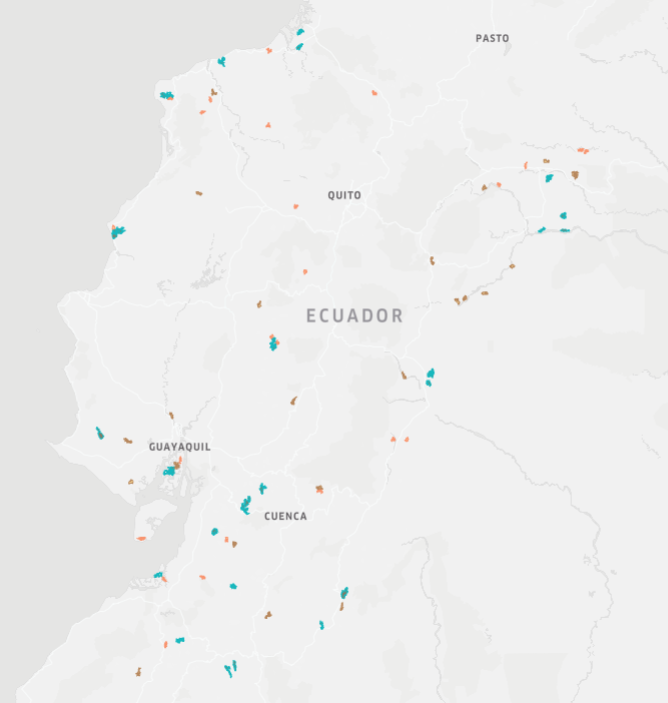

Se econtraron en total 75 posibles areas de bosques a proteger segun su canton

# Reto 2

In [329]:
para_Bosq=cut_gdf[cut_gdf['cobertura0'].str.contains('BOSQUE NATIVO|PARAMO')]

In [330]:
para_Bosq

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry
1,FF010,VEGETACION ARBUSTIVA Y HERBACEA,PARAMO,2018.0,3.78,"POLYGON ((781043.410 9913186.350, 780893.410 9..."
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9..."
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9..."
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9..."
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9..."
...,...,...,...,...,...,...
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9..."
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410..."
152911,FF010,BOSQUE,BOSQUE NATIVO,2018.0,46.62,"POLYGON ((642023.410 9913546.350, 642023.410 9..."
152923,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((566423.410 9913186.350, 566363.410 9..."


In [331]:
para_Bosq['id']= [''.join(random.choices(string.ascii_letters+string.digits,k=random.randint(7,8)))  for i in range(0,len(para_Bosq)) ]


C:\Users\Diego\anaconda3\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [332]:
para_Bosq

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
1,FF010,VEGETACION ARBUSTIVA Y HERBACEA,PARAMO,2018.0,3.78,"POLYGON ((781043.410 9913186.350, 780893.410 9...",gPGVWxh
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",1bXSlvl
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",y8UrKqbt
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",LyDVX9YX
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",M7JtqS40
...,...,...,...,...,...,...,...
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",YlglzMId
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",ssyS03y
152911,FF010,BOSQUE,BOSQUE NATIVO,2018.0,46.62,"POLYGON ((642023.410 9913546.350, 642023.410 9...",EJFDS2B
152923,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.18,"POLYGON ((566423.410 9913186.350, 566363.410 9...",bz3rjH6R


In [333]:
para_Bosq['id'].duplicated().sum() 

0

In [348]:
para_Bosq_1=para_Bosq

# BVP
boscut_bosq_rese=gpd.sjoin(para_Bosq_1,bvp_gdf,how='inner',op='within')
bos_prot=list(boscut_bosq_rese['id'])
contains_filter = '|'.join(bos_prot)
Bosque_Cut_v1=para_Bosq_1[~para_Bosq_1.id.str.match(contains_filter)]


C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [349]:
Bosque_Cut_v1

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
1,FF010,VEGETACION ARBUSTIVA Y HERBACEA,PARAMO,2018.0,3.78,"POLYGON ((781043.410 9913186.350, 780893.410 9...",gPGVWxh
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",1bXSlvl
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",y8UrKqbt
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",LyDVX9YX
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",M7JtqS40
...,...,...,...,...,...,...,...
152891,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((561383.410 9913276.350, 561413.410 9...",L0N7l0pu
152904,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12.24,"POLYGON ((892313.410 9913246.350, 892253.410 9...",jRolbBJ
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",YlglzMId
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",ssyS03y


In [350]:
#Snap
boscut_snap=gpd.sjoin(Bosque_Cut_v1,snap_gdf ,how='inner',op='within')
bos_prot=list(boscut_snap['id'])
contains_filter = '|'.join(bos_prot)
Bosque_Cut_v2=Bosque_Cut_v1[~Bosque_Cut_v1.id.str.match(contains_filter)]

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [351]:
Bosque_Cut_v2

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
1,FF010,VEGETACION ARBUSTIVA Y HERBACEA,PARAMO,2018.0,3.78,"POLYGON ((781043.410 9913186.350, 780893.410 9...",gPGVWxh
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",1bXSlvl
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",y8UrKqbt
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",LyDVX9YX
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",M7JtqS40
...,...,...,...,...,...,...,...
152891,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((561383.410 9913276.350, 561413.410 9...",L0N7l0pu
152904,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12.24,"POLYGON ((892313.410 9913246.350, 892253.410 9...",jRolbBJ
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",YlglzMId
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",ssyS03y


In [358]:
# PSB
boscut_psb=gpd.sjoin(Bosque_Cut_v2,psb_gdf ,how='inner',op='within')
boscut_psb
bos_prot=list(boscut_psb['id'])
contains_filter = '|'.join(bos_prot)
Bosque_Cut_v3=Bosque_Cut_v2[~Bosque_Cut_v2.id.str.match(contains_filter)]

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [359]:
Bosque_Cut_v3

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id
1,FF010,VEGETACION ARBUSTIVA Y HERBACEA,PARAMO,2018.0,3.78,"POLYGON ((781043.410 9913186.350, 780893.410 9...",gPGVWxh
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.98,"POLYGON ((860633.410 9913186.350, 860573.410 9...",1bXSlvl
6,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1.17,"POLYGON ((964973.410 9913186.350, 964943.410 9...",y8UrKqbt
7,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.79,"POLYGON ((966143.410 9913186.350, 965933.410 9...",LyDVX9YX
11,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((566333.410 9913156.350, 566333.410 9...",M7JtqS40
...,...,...,...,...,...,...,...
152891,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.09,"POLYGON ((561383.410 9913276.350, 561413.410 9...",L0N7l0pu
152904,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12.24,"POLYGON ((892313.410 9913246.350, 892253.410 9...",jRolbBJ
152905,FF010,BOSQUE,BOSQUE NATIVO,2018.0,25.47,"POLYGON ((905003.410 9913246.350, 904973.410 9...",YlglzMId
152907,FF010,BOSQUE,BOSQUE NATIVO,2018.0,0.27,"POLYGON ((1108973.410 9913246.350, 1108943.410...",ssyS03y


In [360]:
# Mapa Zonal
zonal_shape='data_concurso/Bases de datos_Categoría 2 DATEANDO POR LA CONSERVACION AMBIENTAL/Shapefile/Direcciones zonales MAATE/DZ_MAATE.shp'
zonal_gdf = gpd.read_file(zonal_shape)


In [361]:
zonal_gdf

,DZ,DZ_CODE,DZ_NUM,Id,km2,geometry
0,AZUAY,DZAZ,ZONAL 6,6,19972.304489,"POLYGON ((922557.343 9691839.952, 917085.030 9..."
1,CHIMBORAZO,DZCH,ZONAL 3,3,32129.684595,"POLYGON ((785305.329 9924296.843, 785343.737 9..."
2,ESMERALDAS,DZES,ZONAL 2,2,32186.562468,"MULTIPOLYGON (((605024.380 10049422.750, 60492..."
3,IMBABURA,DZIM,ZONAL 1,1,6903.791824,"POLYGON ((870550.890 10080682.247, 870398.177 ..."
4,LOJA,DZLO,ZONAL 7,7,18691.883859,"MULTIPOLYGON (((583954.000 9632994.000, 583959..."
5,MANABÍ,DZMA,ZONAL 4,4,11624.761209,"MULTIPOLYGON (((518268.290 9814517.710, 518263..."
6,NAPO,DZNA,ZONAL 8,8,47119.578789,"POLYGON ((1147851.637 9891916.878, 1147630.730..."
7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927,"POLYGON ((1147851.637 9891916.878, 1147721.737..."
8,ZAMORA,DZZA,ZONAL 10,10,14499.916666,"POLYGON ((795133.597 9670555.512, 795186.434 9..."
9,GUAYAS,DZGU,ZONAL 5,5,55906.251708,"MULTIPOLYGON (((-465488.345 9842395.755, -4655..."


In [397]:
# PSB
boscut_Zonal=gpd.sjoin(Bosque_Cut_v3,zonal_gdf,how='inner',op='within')
# boscut_psb
# bos_prot=list(boscut_psb['id'])
# contains_filter = '|'.join(bos_prot)
# Bosque_Cut_v3=Bosque_Cut_v2[~Bosque_Cut_v2.id.str.match(contains_filter)]

C:\Users\Diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [398]:
boscut_Zonal=boscut_Zonal.sort_values(by=['area_super'],ascending=False)

In [399]:
zonas=list(boscut_Zonal['DZ_NUM'].unique())
zonas

['ZONAL 2',
 'ZONAL 9',
 'ZONAL 5',
 'ZONAL 8',
 'ZONAL 3',
 'ZONAL 4',
 'ZONAL 10',
 'ZONAL 7',
 'ZONAL 6',
 'ZONAL 1']

In [406]:
ft=[]
for i in range(0,len(zonas)): 
     ft.append(boscut_Zonal[boscut_Zonal['DZ_NUM']==zonas[i]].head(10))

In [407]:
ft[1]

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry,id,index_right,DZ,DZ_CODE,DZ_NUM,Id,km2
121529,FF010,BOSQUE,BOSQUE NATIVO,2018.0,67965.30,"POLYGON ((1065743.410 10013626.350, 1065743.41...",BSU2yHm3,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
134930,FF010,BOSQUE,BOSQUE NATIVO,2018.0,12080.16,"POLYGON ((1010843.410 9967876.350, 1010783.410...",XlQlqWU,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
126911,FF010,BOSQUE,BOSQUE NATIVO,2018.0,9863.01,"POLYGON ((971723.410 10006216.350, 971723.410 ...",segV65N,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
129414,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2888.82,"POLYGON ((972173.410 9986656.350, 972173.410 9...",C7Ks66v9,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
122665,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2532.24,"POLYGON ((971663.410 10008226.350, 971663.410 ...",Jfcox8B,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
125625,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2362.68,"POLYGON ((987563.410 10003186.350, 987563.410 ...",vUKJAz0,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
126137,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1903.95,"POLYGON ((965933.410 10002376.350, 965933.410 ...",4ASZp5jx,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
122022,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1673.73,"POLYGON ((1056353.410 10010236.350, 1056353.41...",DrJwQ0IJ,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
131530,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1215.72,"POLYGON ((993773.410 9980476.350, 993773.410 9...",RFvUE2a,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927
128214,FF010,BOSQUE,BOSQUE NATIVO,2018.0,1212.57,"POLYGON ((988883.410 9993226.350, 988793.410 9...",qGgNbAEZ,7,SUCUMBÍOS,DZSU,ZONAL 9,9,18180.559927


In [416]:
# Creamos el mapa
map_2 = KeplerGl(height=800,weight=200)

for i in range(0,len(ft)):
    map_2.add_data(data=ft[i], name=zonas[i])
    
    
map_2.add_data(data=zonal_gdf, name='Zona')
map_2 

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'ZONAL 2': {'index': [150102, 123205, 105169, 132172, 99291, 103984, 138743, 105807, 101287, 14…

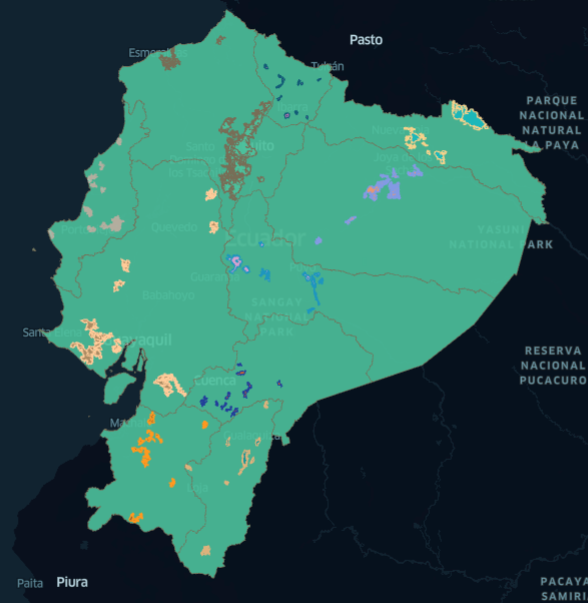

Se econtraron en total 10 Areas posibles a proteger segun la zona ubicada